In [40]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import ast
import matplotlib.pyplot as plt 
import plotly
import plotly.offline as py
from wordcloud import WordCloud, STOPWORDS
sb.set() 


In [39]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head().transpose()

0  \
budget                                                        237000000   
genres                [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
homepage                                    http://www.avatarmovie.com/   
id                                                                19995   
keywords              [{"id": 1463, "name": "culture clash"}, {"id":...   
original_language                                                    en   
original_title                                                   Avatar   
overview              In the 22nd century, a paraplegic Marine is di...   
popularity                                                   150.437577   
production_companies  [{"name": "Ingenious Film Partners", "id": 289...   
production_countries  [{"iso_3166_1": "US", "name": "United States o...   
release_date                                                 2009-12-10   
revenue                                                      2787965087   
runtime                                                           162.0   
spoken_languages      [{"iso_639_1": "en", "name": "English"}, {"iso...   
status                                                         Released   
tagline                                     Enter the World of Pandora.   
title                                                            Avatar   
vote_average                                                        7.2   
vote_count                                                        11800   

                                                                      1  \
budget                                                        300000000   
genres                [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
homepage                   http://disney.go.com/disneypictures/pirates/   
id                                                                  285   
keywords              [{"id": 270, "name": "ocean"}, {"id": 726, "na...   
original_language                                                    en   
original_title                 Pirates of the Caribbean: At World's End   
overview              Captain Barbossa, long believed to be dead, ha...   
popularity                                                   139.082615   
production_companies  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
production_countries  [{"iso_3166_1": "US", "name": "United States o...   
release_date                                                 2007-05-19   
revenue                                                       961000000   
runtime                                                           169.0   
spoken_languages               [{"iso_639_1": "en", "name": "English"}]   
status                                                         Released   
tagline                  At the end of the world, the adventure begins.   
title                          Pirates of the Caribbean: At World's End   
vote_average                                                        6.9   
vote_count                                                         4500   

                                                                      2  \
budget                                                        245000000   
genres                [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
homepage                    http://www.sonypictures.com/movies/spectre/   
id                                                               206647   
keywords              [{"id": 470, "name": "spy"}, {"id": 818, "name...   
original_language                                                    en   
original_title                                                  Spectre   
overview              A cryptic message from Bond’s past sends him o...   
popularity                                                   107.376788   
production_companies  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
production_countries  [{"iso_3166_1": "GB", "name": "United Kingdom"...   
release_date      

In [10]:
df.shape

(4803, 20)

In [4]:
df[df['budget'] == 0].shape

(1037, 20)

In [5]:
df[df['revenue'] == 0].shape

(1427, 20)

In [8]:
data = df

## Data Cleaning

In [29]:
data = data[data['genres'] !='[]']
data = data[data['keywords'] !='[]']
data

budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4795          0                      [{"id": 18, "name": "Drama"}]   
4796       7000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4795                                                NaN  124606   
4796                         http://www.primermovie.com   14337   
4798                                                NaN    9367   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4802                                                NaN   25975   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4     [{"id": 818, "name": "based on novel"}, {"id":...                en   
...                                                 ...               ...   
4795  [{"id": 10726, "name": "gang"}, {"id": 33928, ...                en   
4796  [{"id": 1448, "name": "distrust"}, {"id": 2101...                en   
4798  [{"id": 5616, "name": "united states\u2013mexi...                es   
4800  [{"id": 248, "name": "date"}, {"id": 699, "nam...                en   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4795                                      Bang   
4796                                    Primer   
4798                               El Mariachi   
4800                 Signed, Sealed, Delivered   
4802                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4795  A young woman in L.A. is having a bad day: she...    0.918116   
4796  Friends/fledgling entrepreneurs invent a devic...   23.307949   
4798  El Mariachi just wants to play his guitar and ...   14.269792   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4802  Ever since the second grade when he first saw ... 

## Production Countries
Remove data where "production_countries" is empty

In [30]:
country_data = data[data['production_countries'] !='[]']

In [31]:
country_data['production_countries'] = country_data['production_countries'].fillna('[]').apply(ast.literal_eval)
country_data['production_countries'] = country_data['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
country_data

budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4795          0                      [{"id": 18, "name": "Drama"}]   
4796       7000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4795                                                NaN  124606   
4796                         http://www.primermovie.com   14337   
4798                                                NaN    9367   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4802                                                NaN   25975   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4     [{"id": 818, "name": "based on novel"}, {"id":...                en   
...                                                 ...               ...   
4795  [{"id": 10726, "name": "gang"}, {"id": 33928, ...                en   
4796  [{"id": 1448, "name": "distrust"}, {"id": 2101...                en   
4798  [{"id": 5616, "name": "united states\u2013mexi...                es   
4800  [{"id": 248, "name": "date"}, {"id": 699, "nam...                en   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4795                                      Bang   
4796                                    Primer   
4798                               El Mariachi   
4800                 Signed, Sealed, Delivered   
4802                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4795  A young woman in L.A. is having a bad day: she...    0.918116   
4796  Friends/fledgling entrepreneurs invent a devic...   23.307949   
4798  El Mariachi just wants to play his guitar and ...   14.269792   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4802  Ever since the second grade when he first saw ... 

In [15]:
s = country_data.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [16]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

num_movies                   country
0         3720  United States of America
1          606            United Kingdom
2          309                   Germany
3          280                    France
4          242                    Canada
5          107                 Australia
6           68                     Italy
7           65                     Spain
8           55                     Japan
9           50                     China
10          41                 Hong Kong
11          41                     India
12          36                   Ireland
13          30                    Mexico
14          27               New Zealand
15          24            Czech Republic
16          23                   Belgium
17          19              South Africa
18          19                   Denmark
19          19                    Sweden

### Remove production country of USA 

More than 90% of movies are production in USA. In order to make other counties more clear in map, we need to remove USA from the list

In [17]:
con_df[con_df['country'] == 'United States of America']['num_movies'] / len(data)

0    0.862709
Name: num_movies, dtype: float64

In [18]:
con_df = con_df[con_df['country'] != 'United States of America']

In [19]:
map_data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries for the Movies (Exclude US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=map_data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

## Wordcloud

In [48]:
wordcloud_data = data[data['genres'] !='[]']
wordcloud_data = data[data['keywords'] !='[]']
wordcloud_data.shape

(4312, 20)

In [49]:
wordcloud_data['genres'] = wordcloud_data['genres'].fillna('[]').apply(ast.literal_eval)
wordcloud_data['genres'] = wordcloud_data['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
wordcloud_data['keywords'] = wordcloud_data['keywords'].fillna('[]').apply(ast.literal_eval)
wordcloud_data['keywords'] = wordcloud_data['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [50]:
wordcloud_data['genres'] = wordcloud_data['title'].astype('str')
wordcloud_data['keywords'] = wordcloud_data['keywords'].astype('str')

In [51]:
genres_corpus = ' '.join(wordcloud_data['genres'])
keywords_corpus = ' '.join(wordcloud_data['keywords'])

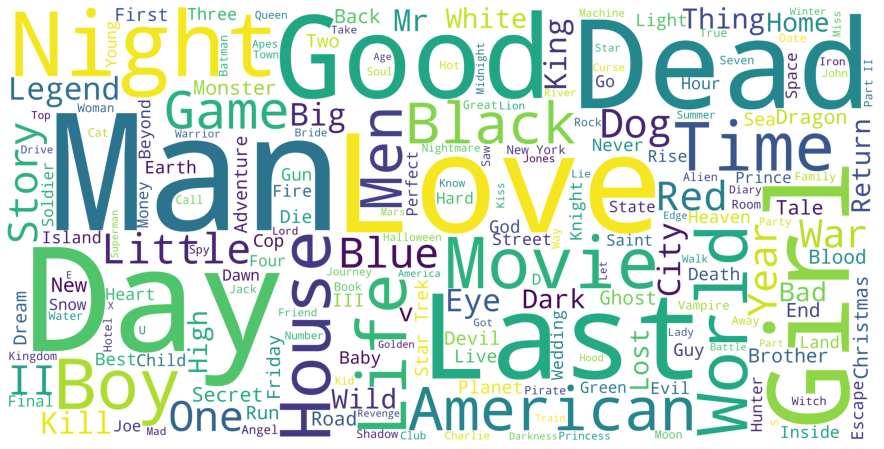

In [42]:
genres_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(genres_corpus)
plt.figure(figsize=(16,8))
plt.imshow(genres_wordcloud)
plt.axis('off')
plt.show()

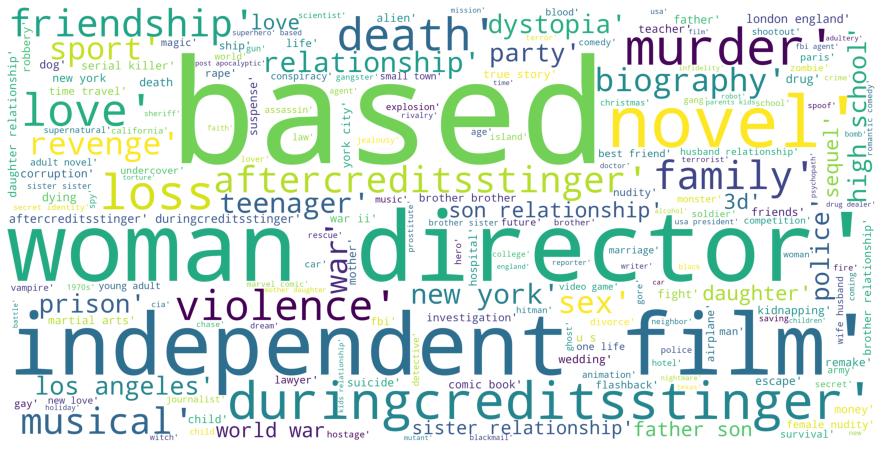

In [47]:
keywords_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(keywords_corpus)
plt.figure(figsize=(16,8))
plt.imshow(keywords_wordcloud)
plt.axis('off')
plt.show()